In [32]:
# julia version of stability lp tester
using Clarabel
using Convex
using Plots

unif(m) = [1/m for i in 1:m]

setprecision(BigFloat,512)

function get_x1_value(m,w)
    x = Variable(m)
#    wprime = w / (2 * minimum(w))
#    B = 2 * minimum(w)/ log(m)
    constraints = [sum(x) >= 1, x >= 0]
    p = minimize(dot(w,x) - minimum(w) * entropy(x) / ( log(m)), constraints, numeric_type=BigFloat)
    solve!(p, Clarabel.Optimizer{BigFloat}, silent=true)
    return evaluate(x)[1]
end


function perturb_by_delta(m,delta)
    w = unif(m)
    w[1] -= delta
    return w
end


perturb_by_delta (generic function with 1 method)

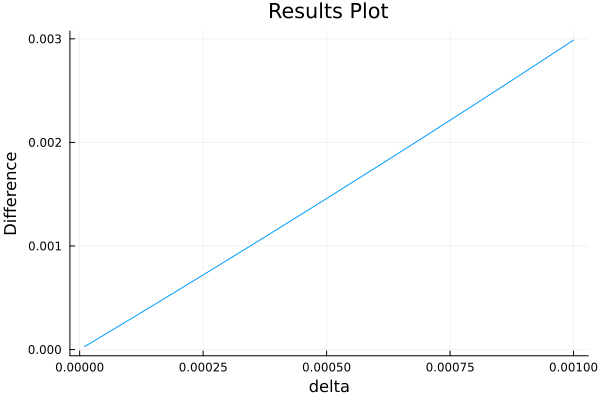

In [33]:
# the leading order behavior in delta looks linear -- that's good


deltas = 0.00001:0.00001:0.001
m=20
results = [abs(get_x1_value(m, unif(m)) - get_x1_value(m, perturb_by_delta(m,delta)))   for delta in deltas]
plot(deltas, results, xlabel="delta", ylabel="Difference", title="Results Plot", legend=false)


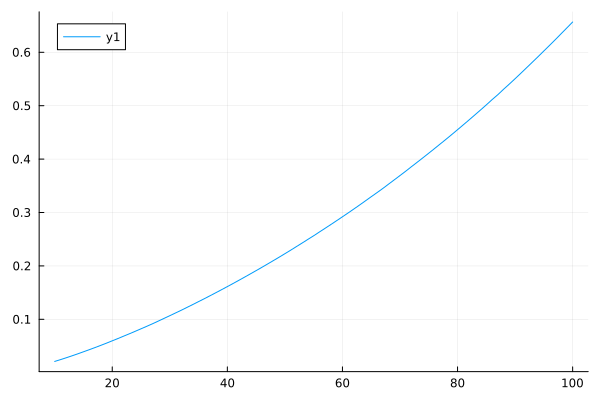

In [38]:
# now let's investigate what the coefficient of the linear term is, as a function of m
delta = 0.001
ms = 10:1:100
results = [abs(get_x1_value(m, unif(m)) - get_x1_value(m, perturb_by_delta(m,delta))) * m for m in ms]
plot(ms, results)

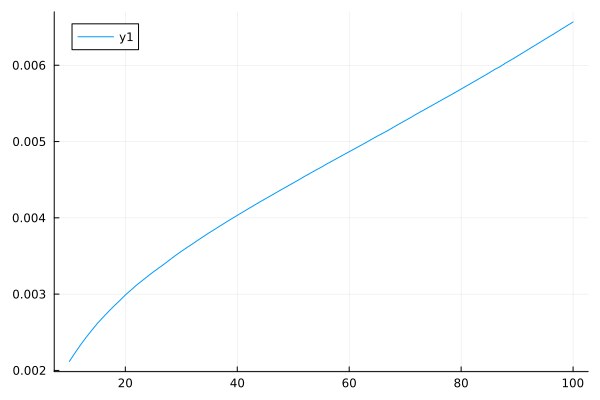

In [39]:
results2 = [results[i] / (ms[i]) for i in 1:length(ms)]
plot(ms, results2)

In [20]:
function get_x2_value(m,w)
    x = Variable(m)
#    wprime = w / (2 * minimum(w))
#    B = 2 * minimum(w)/ log(m)
    constraints = [sum(x) >= 1, x >= 0]
    p = minimize(dot(w,x) - entropy(x) / ( log(m) * minimum(w)), constraints, numeric_type=BigFloat)
    solve!(p, Clarabel.Optimizer{BigFloat}, silent=true)
    return evaluate(x)[2]
end

get_x2_value (generic function with 1 method)

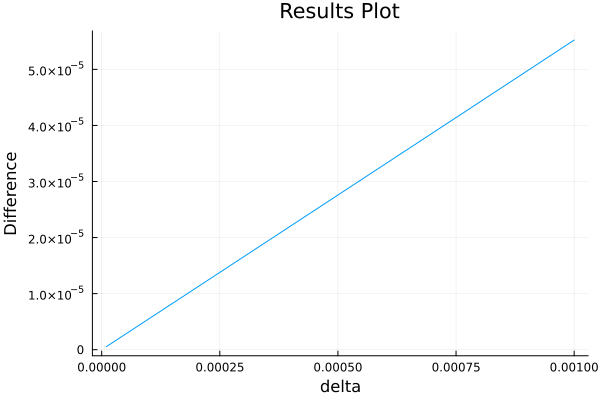

In [22]:
# is the behavior for x2 linear in delta as well?
deltas = 0.00001:0.00001:0.001
m=20
results = [abs(get_x2_value(m, unif(m)) - get_x2_value(m, perturb_by_delta(m,delta)))   for delta in deltas]
plot(deltas, results, xlabel="delta", ylabel="Difference", title="Results Plot", legend=false)

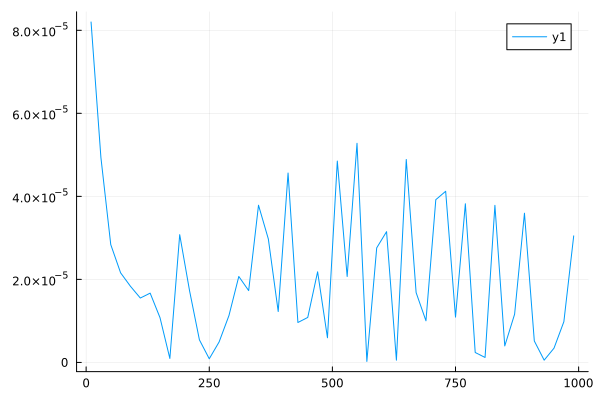

In [23]:
# now let's investigate what the coefficient of the linear term is, as a function of m
delta = 0.001
ms = 10:20:1000
results = [abs(get_x2_value(m, unif(m)) - get_x2_value(m, perturb_by_delta(m,delta))) for m in ms]
plot(ms, results)

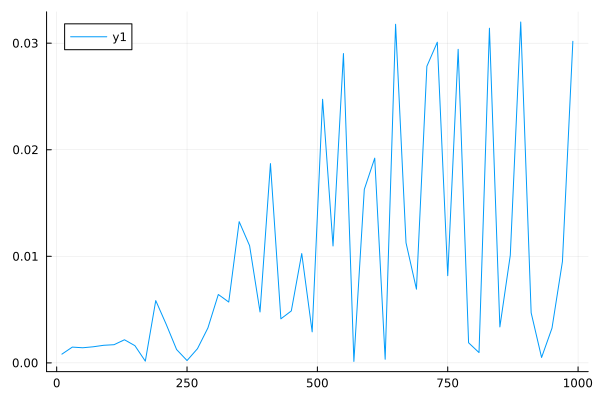

In [29]:
results_times_m = [results[i] * ms[i] for i in 1:length(ms)]
plot(ms, results_times_m)

In [30]:
function get_x_value(m,w)
    x = Variable(m)
#    wprime = w / (2 * minimum(w))
#    B = 2 * minimum(w)/ log(m)
    constraints = [sum(x) >= 1, x >= 0]
    p = minimize(dot(w,x) - entropy(x) / ( log(m) * minimum(w)), constraints, numeric_type=BigFloat)
    solve!(p, Clarabel.Optimizer{BigFloat}, silent=true)
    return evaluate(x)
end

get_x_value (generic function with 1 method)

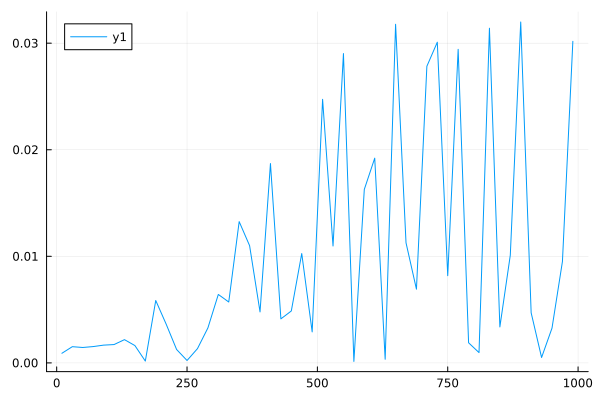

In [31]:
delta = 0.001
ms = 10:20:1000
results = [sum(abs.(get_x_value(m, unif(m)) - get_x_value(m, perturb_by_delta(m,delta)))) for m in ms]
plot(ms, results)

Above plot makes it look like \sum_i |xi - xi'| is like O(delta), rather than O(delta/m), which is what we would want, I think.